# Quiz 

### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline
np.random.seed(42)

In [450]:
full_data = pd.read_csv('../../Data/coffee_dataset.csv')
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60. What are the null and alternative hypotheses?

$$\begin{align}H_0:&\quad\mu_0 = 67.60\\ H_A:&\quad\mu_A\neq 67.60\end{align}$$
Remember that our hypotheses concern population parameters, not sample statistics. In other words, we want to make statements and conclusions about our population.

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 

In [451]:
print('Population mean: ', full_data['height'].mean())
print('Population std: ', full_data['height'].std())

Population mean:  67.59748697307934
Population std:  3.119433206550344


Mean of the Sampling Distribution of the Mean: 67.58056140842555
Std of the Sampling Distribution of the Mean: 1.3856817229811325
Lower Limit, 2.5%:  64.82906695403113
Upper Limit, 97.5%:  70.20869665180145


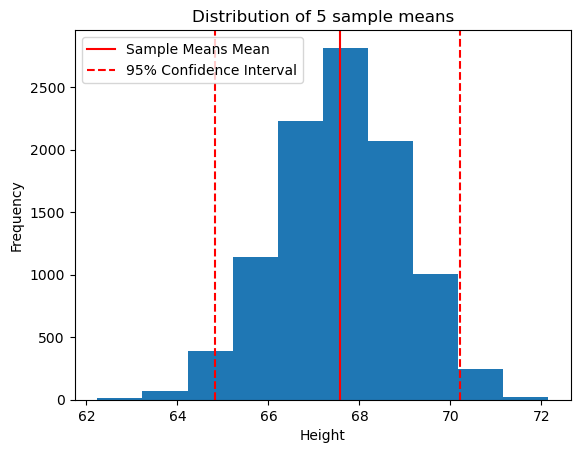

In [452]:
heights = full_data['height'].values

# Take 10,000 samples of 5 observations using bootstrapping to estimate the sampling distribution of the mean
sample_means = np.random.choice(heights, size=(10000, 5), replace=True).mean(axis=1)
print('Mean of the Sampling Distribution of the Mean:', sample_means.mean())
print('Std of the Sampling Distribution of the Mean:', sample_means.std())

# Identify the 95% confidence interval
lower, upper = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)
print('Lower Limit, 2.5%: ', lower)
print('Upper Limit, 97.5%: ', upper)

plt.hist(sample_means)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of 5 sample means')
plt.axvline(x=sample_means.mean(), color='r', label='Sample Means Mean')
plt.axvline(x=lower, color='r', linestyle='--', label='95% Confidence Interval')
plt.axvline(x=upper, color='r', linestyle='--')
plt.legend()
plt.show()

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

Std of the Sampling Distribution of the Mean: 0.7715529714358992


Left-Tail Cutoff:  67.36267366764534
Right-Tail Cutoff:  67.83732633235465
p-value: 0.7567999999999999


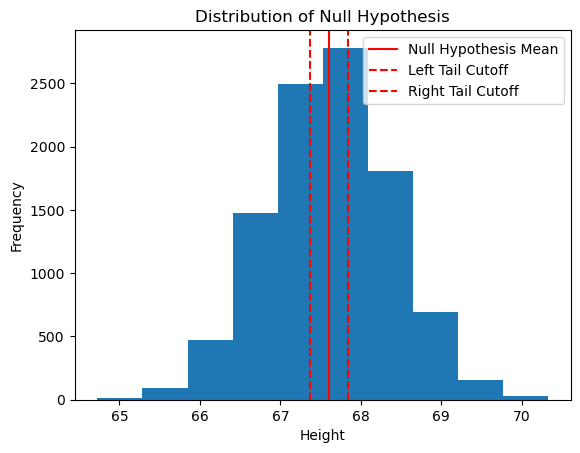

In [453]:
num_sims = 10000

# Take a sample of 5 observations from the population and compute the mean
observations5 = full_data.sample(5)['height']
observations_mean5 = observations5.mean()

# Take 10,000 samples of 5 observations using bootstrapping to estimate the sampling distribution of the mean
sampling_dist_mean = np.random.choice(observations5, size=(num_sims, 5), replace=True).mean(axis=1)
print('Std of the Sampling Distribution of the Mean:', sampling_dist_mean.std())

# Alternatively, you can compute the standard deviation of the sampling distribution theoretically, sigma_sampling = sigma/sqrt(n)
# std_sampling_dist = full_data['height'].std()/np.sqrt(5)  

null_mean = 67.60 # Defined by the null hypothesis
# Simulate the sampling distribution of the mean using the null hypothesis mean and the standard deviation of the sampling distribution
null_sims = np.random.normal(null_mean, sampling_dist_mean.std(), num_sims)

# For a two sided hypothesis, we want to compute the probabilities of observing values more extreme than observed in both directions
# We assume the null distribution is normal and therefore symmetric
if observations_mean5 > null_mean:
    left_tail_cutoff = (null_mean - (observations_mean5 - null_mean))
    right_tail_cutoff = observations_mean5
else:
    left_tail_cutoff = observations_mean5
    right_tail_cutoff = (null_mean + (null_mean - observations_mean5))

print('Left-Tail Cutoff: ', left_tail_cutoff)
print('Right-Tail Cutoff: ', right_tail_cutoff)
print('p-value:', (null_sims > right_tail_cutoff).mean() + (null_sims < left_tail_cutoff).mean())

plt.hist(null_sims)
plt.axvline(x=null_sims.mean(), color='r', label='Null Hypothesis Mean') # Where our sampling distribution mean falls on the theoretical null distribution
plt.axvline(x=left_tail_cutoff, color='r', linestyle='--', label='Left Tail Cutoff')
plt.axvline(x=right_tail_cutoff, color='r', linestyle='--', label='Right Tail Cutoff')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Null Hypothesis')
plt.show()

Given the computed p-value, would you reject or fail to reject $H_0$ given a significance level of $\alpha=0.05$?  
Answer: Fail to reject

### Sample Size Effect

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

Std of the Sampling Distribution of the Mean: 0.1782372697327534
Left-Tail Cutoff:  67.39528821472807
Right-Tail Cutoff:  67.80471178527192
p-value: 0.249


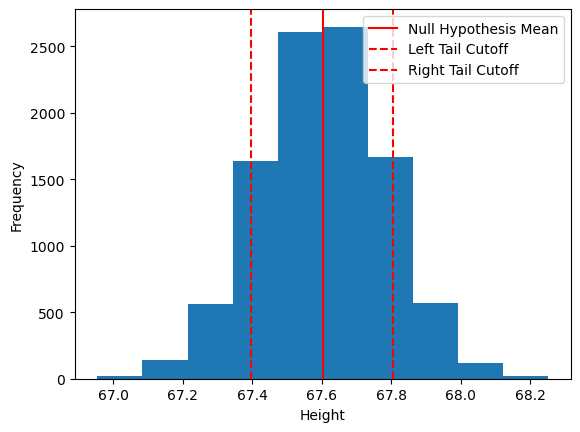

In [454]:
observations300 = full_data.sample(300)['height']

# Take a sample of 300 observations from the population and compute the mean
observations_mean300 = observations300.mean()

# Take 10,000 samples of 300 observations using bootstrapping to estimate the sampling distribution of the mean
sampling_dist_mean = np.random.choice(observations300, size=(num_sims, 300), replace=True).mean(axis=1)
print('Std of the Sampling Distribution of the Mean:', sampling_dist_mean.std())

# Simulate the sampling distribution of the mean using the null hypothesis mean and the standard deviation of the sampling distribution
null_sims = np.random.normal(null_mean, sampling_dist_mean.std(), num_sims)

# For a two sided hypothesis, we want to compute the probabilities of observing values more extreme than observed in both directions
# We assume the null distribution is normal and therefore symmetric
if observations_mean300 > null_mean:
    left_tail_cutoff = (null_mean - (observations_mean300 - null_mean))
    right_tail_cutoff = observations_mean300
else:
    left_tail_cutoff = observations_mean300
    right_tail_cutoff = (null_mean + (null_mean - observations_mean300))

print('Left-Tail Cutoff: ', left_tail_cutoff)
print('Right-Tail Cutoff: ', right_tail_cutoff)
print('p-value:', (null_sims > right_tail_cutoff).mean() + (null_sims < left_tail_cutoff).mean())

plt.hist(null_sims)
plt.axvline(x=null_sims.mean(), color='r', label='Null Hypothesis Mean') # Where our sampling distribution mean falls on the theoretical null distribution
plt.axvline(x=left_tail_cutoff, color='r', linestyle='--', label='Left Tail Cutoff')
plt.axvline(x=right_tail_cutoff, color='r', linestyle='--', label='Right Tail Cutoff')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()

`5.` Reflect on what happened by answering the final quiz in this concept.

Answer: Even with a very *small* difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size. Intuitively, this should make sense. As we take larger samples from our population, our sample mean should better and more tightly fit the population mean. Consequently, small variations from our null hypothesis mean should be more readily perceived as significant.

### Multiple Iterations Effect

In [457]:
count = 0
for _ in range(num_sims):
    sample_mean = full_data.sample(5)['height'].mean()
    
    # For a two-sided hypothesis, we want to compute the probabilities of observing values more extreme than observed in both directions
    if sample_mean > null_mean:
        cdf_value = norm.cdf(null_mean-(sample_mean-null_mean), null_mean, full_data['height'].std()/np.sqrt(5)) # The standard deviation of the sampling distribution is sigma/sqrt(n)
    else:
        cdf_value = norm.cdf(sample_mean, null_mean, full_data['height'].std()/np.sqrt(5))
    prob = cdf_value*2

    # We assume a significance level of 0.05 & test if the probability is less than 0.025 or greater than 0.975 for a two-sided test
    if prob < 0.025 or prob > 0.975:
        count += 1
print(count/num_sims)

0.0492


From this, we can see that running the test 10,000 times tends to produce Type I error rate of approximately 5%.